In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import pandas as pd
#os.chdir(r"/Users/yeji/SWING 2023 해커톤 with LONDON/전처리데이터/연도별")


# 미세먼지 + 초미세먼지 발령 합침

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import pandas as pd
#os.chdir(r"/Users/yeji/SWING 2023 해커톤 with LONDON/전처리데이터/연도별")

주의보_df = pd.read_csv("경보발령수(년도,발령수).csv", engine="python")

In [3]:
주의보_df

,년도,발령수
0,2007,2
1,2008,2
2,2009,2
3,2010,1
4,2011,0
5,2012,0
6,2013,2
7,2014,8
8,2015,9
9,2016,6


In [4]:
주의보_df.drop(주의보_df[(주의보_df['년도'] >2019)].index, inplace=True)

In [5]:
주의보_df

,년도,발령수
0,2007,2
1,2008,2
2,2009,2
3,2010,1
4,2011,0
5,2012,0
6,2013,2
7,2014,8
8,2015,9
9,2016,6


In [6]:
주의보_년도정리_df= 주의보_df.drop(주의보_df[(주의보_df['년도'] < 2010)].index, inplace=True)
주의보_년도정리_df

In [7]:
주의보_df

,년도,발령수
3,2010,1
4,2011,0
5,2012,0
6,2013,2
7,2014,8
8,2015,9
9,2016,6
10,2017,11
11,2018,18
12,2019,33


# 비염

In [8]:
five비염_df = pd.read_csv("연령군5천식연도별.csv", engine="python")

In [9]:
five비염_df = five비염_df.drop(['Unnamed: 0'],axis=1)

In [10]:
five비염_df

,년도,진료수
0,2010,91102
1,2011,93890
2,2012,105153
3,2013,105022
4,2014,106068
5,2015,99071
6,2016,101154
7,2017,96603
8,2018,105697
9,2019,104282


In [11]:
five비염_df.drop(five비염_df[(five비염_df['년도'] >2019)].index, inplace=True)

In [12]:
five비염_df

,년도,진료수
0,2010,91102
1,2011,93890
2,2012,105153
3,2013,105022
4,2014,106068
5,2015,99071
6,2016,101154
7,2017,96603
8,2018,105697
9,2019,104282


In [13]:
new_merged_five_df = pd.merge(주의보_df, five비염_df)
new_merged_five_df

,년도,발령수,진료수
0,2010,1,91102
1,2011,0,93890
2,2012,0,105153
3,2013,2,105022
4,2014,8,106068
5,2015,9,99071
6,2016,6,101154
7,2017,11,96603
8,2018,18,105697
9,2019,33,104282


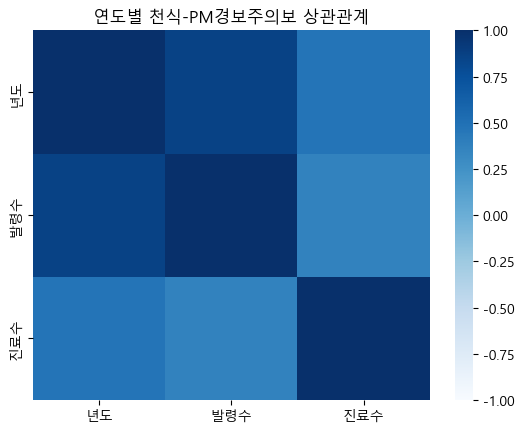

In [15]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = new_merged_five_df.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues, vmin = -1.0, vmax=1.0, )  
plt.title('연도별 천식-PM경보주의보 상관관계')
plt.show()

In [15]:
# cor_target_abs0 = cor['진료수'].sort_values(ascending=False)
# print(cor_target_abs0)


cor_target = cor['진료수']
print(cor_target)

년도     0.474796
발령수    0.368791
진료수    1.000000
Name: 진료수, dtype: float64


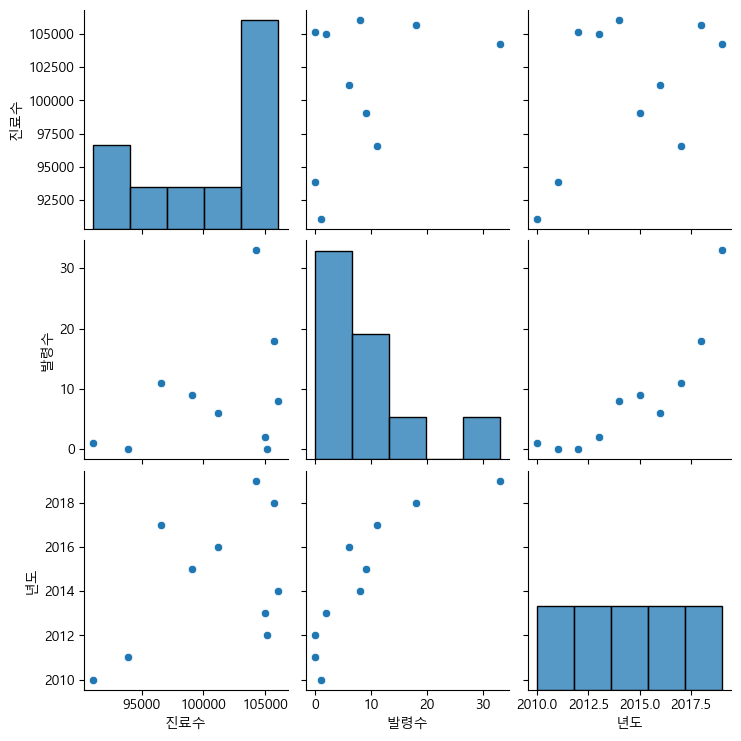

In [16]:
#산점도로 표현
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
#sns.set(style='whitegrid')
sns.pairplot(new_merged_five_df[['진료수', '발령수', 
                     '년도']])

plt.show()